# ***RK4***

<ipython-input-6-6abd6990d3e1>:18: RuntimeWarning: invalid value encountered in double_scalars
  return [2+math.sin(t)-k1*(K-v)**bta*u**alph+k2*v**gma, 1+math.cos(t)+k1*(K-v)**bta*u**alph-(k1+k2)*v**gma]


5
5.039659755613538e-09


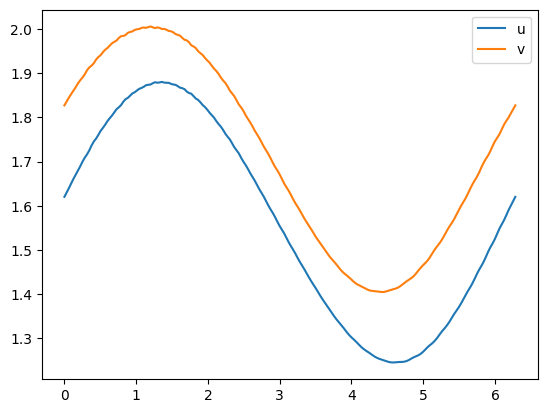

In [ ]:
import pylab
import math
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt


bta=1
gma=2
alph=3
k1=1.1
k2=1.3
K=3
a,b=(0.6, 0.6)
t = np.linspace(0,2*np.pi,100)
def FG(t,w):
  u,v=w
  return [2+math.sin(t)-k1*(K-v)**bta*u**alph+k2*v**gma, 1+math.cos(t)+k1*(K-v)**bta*u**alph-(k1+k2)*v**gma]

eta=0.01; epsilon=1e-8;

k=0; err=1;
u0 = [a,b]
solution = solve_ivp(FG, [0, 2*np.pi], u0,dense_output=True).sol(t)
u = solution[0]
v = solution[1]
while (err>epsilon):
  solution = solve_ivp(FG, [0, 2*np.pi], u0,dense_output=True).sol(t)
  u = solution[0]
  v = solution[1]
  y_end=[u[-1],v[-1]]
  err=np.linalg.norm(np.array(u0) - np.array(y_end) ,2)
  u0=y_end
  k=k+1



print(k)
print(err)

plt.plot(t, u, label='u')
plt.plot(t, v, label='v')
plt.legend(loc='best')
plt.show()


# ***dde installation***


In [ ]:
pip install deepxde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ***Model1***

Compiling model...
Building feed-forward neural network...
'build' took 0.081008 s

'compile' took 4.554869 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [4.54e+04, 4.59e+04, 9.24e+00, 5.46e+00]    [4.54e+04, 4.59e+04, 9.24e+00, 5.46e+00]    []  
1000      [5.51e+00, 1.44e+00, 4.53e-01, 1.25e+00]    [5.51e+00, 1.44e+00, 4.53e-01, 1.25e+00]    []  
2000      [4.81e+00, 1.49e+00, 1.48e-01, 2.34e-01]    [4.81e+00, 1.49e+00, 1.48e-01, 2.34e-01]    []  

Best model at step 2000:
  train loss: 6.69e+00
  test loss: 6.69e+00
  test metric: []

'train' took 15.909000 s

Compiling model...
'compile' took 4.030785 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
2000      [4.81e+00, 1.49e+00, 1.48e-01, 2.34e-01]    [4.81e+00, 1.49e+00, 1.48e-01, 2.34e-01]    []  
2593      [1.36e-05, 9.84e-06, 8.25e-07, 6.23e-07]    [1.

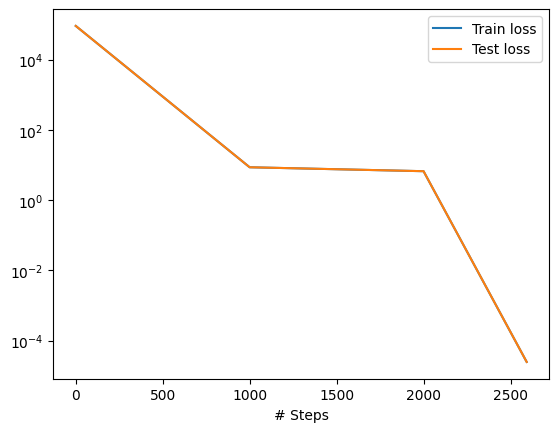

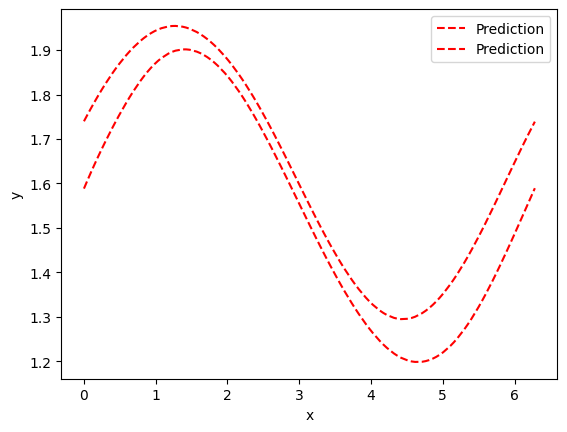

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

import deepxde as dde

import tensorflow_addons as tfa

from tensorflow_addons import activations





bta=1
gma=2
alph=3
k1=1.1
k2=1.3
K=3

def f(t,u,v):
  a=tf.pow((K-v),bta)
  b=tf.pow(u,alph)
  c=tf.pow(v,gma)
  return 2+tf.sin(t)-k1*a*b+k2*c
def g(t,u,v):
  a=tf.pow((K-v),bta)
  b=tf.pow(u,alph)
  c=tf.pow(v,gma)
  return 1+tf.cos(t)+k1*a*b-(k1+k2)*c



def ode_system(t, y):
    u, v = y[:, 0:1], y[:, 1:]
    du_t = tf.gradients(u, t)[0]
    dv_t = tf.gradients(v, t)[0]
    return [du_t - f(t,u,v), dv_t - g(t,u,v)]

def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0,2*np.pi)
bc_u = dde.PeriodicBC(geom, 0, lambda _, on_boundary: on_boundary, derivative_order=0, component=0)
bc_v = dde.PeriodicBC(geom, 0, lambda _, on_boundary: on_boundary, derivative_order=0, component=1)
layer_size = [1] + [20] * 3 + [2]
activation = tfa.activations.snake
#activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)
def feature_transform(inputs):
# Periodic BC in x
  P = 2*np.pi
  w = 2 * np.pi / P
  t = w*inputs[:,:1]
  return tf.concat(
    (
        tf.math.cos(t),
        tf.math.sin(t),
        tf.math.cos(2 * t),
        tf.math.sin(2 * t),
        tf.math.cos(3 * t),
        tf.math.sin(3 * t),
        tf.math.cos(4 * t),
        tf.math.sin(4 * t),
        tf.math.cos(5 * t),
        tf.math.sin(5 * t),
        # tf.math.cos(6 * t),
        # tf.math.sin(6 * t),
        # tf.math.cos(7 * x),
        # tf.math.sin(7 * x),
        # tf.math.cos(8 * x),
        # tf.math.sin(8 * x),
        # tf.math.cos(9 * x),
        # tf.math.sin(9 * x),
        # tf.math.cos(10 * x),
        # tf.math.sin(10 * x),
    ),
    axis=1,
)



############################################################
#net.apply_feature_transform(feature_transform)





data = dde.data.PDE(geom,ode_system, [bc_u, bc_v],num_domain=100, num_boundary=2)
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(epochs=2000)
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

dde.saveplot(losshistory, train_state, issave=True, isplot=True)



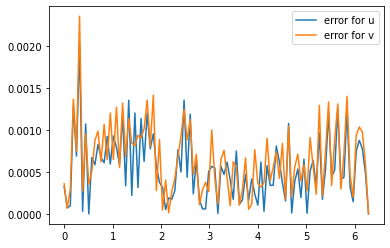

In [ ]:
from matplotlib import pyplot as plt

N=100
hpas=np.linspace(0, 2*np.pi, N)
err1=np.zeros(N)
err2=np.zeros(N)
for i in range(N-1):
  pred=model.predict(np.array([[hpas[i]]]))
  err1[i]=np.sqrt(np.power(pred[0, 0]-u[i],2))
  err2[i]=np.sqrt(np.power(pred[0, 1]-v[i],2))

plt.plot(hpas, err1, label='error for u')
plt.plot(hpas, err2, label='error for v')
plt.legend(loc='best')
plt.show()

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

import deepxde as dde





n=1
def f(t,u,v):
  bta=1
  gma=2
  alph=3
  k1=1.1
  k2=1.3
  K=3
  return 2+tf.sin(t)-k1*(K-v)**bta*u**alph+k2*v**gma
def g(t,u,v):
  bta=1
  gma=2
  alph=3
  k1=1.1
  k2=1.3
  K=3
  return 1+tf.cos(t)+k1*(K-v)**bta*u**alph-(k1+k2)*v**gma



def ode_system(t, y):
    u, v = y[:, 0:1], y[:, 1:]
    du_t = tf.gradients(u, t)[0]
    dv_t = tf.gradients(v, t)[0]
    return [du_t - f(t,u,v), dv_t - g(t,u,v)]

def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0,2*np.pi)
bc_u = dde.PeriodicBC(geom, 0, lambda _, on_boundary: on_boundary, derivative_order=0, component=0)
bc_v = dde.PeriodicBC(geom, 0, lambda _, on_boundary: on_boundary, derivative_order=0, component=1)
layer_size = [1] + [50] * 7 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

data = dde.data.PDE(geom,ode_system, [bc_u, bc_v],num_domain=300, num_boundary=2)
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(epochs=10000)
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

dde.saveplot(losshistory, train_state, issave=True, isplot=True)



Compiling model...
Building feed-forward neural network...
'build' took 0.093855 s



/usr/local/lib/python3.9/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.900352 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [nan, nan, 1.32e-01, 1.45e-01]              [nan, nan, 1.32e-01, 1.45e-01]              []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 0.964765 s

Compiling model...
'compile' took 0.763949 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
1         [nan, nan, nan, nan]                        [nan, nan, nan, nan]                        []  
105       [nan, nan, nan, nan]                        [nan, nan, nan, nan]                        []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 3.384812 s

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


ValueError: ignored